In [8]:
# Chest X-ray Image Classification

In [6]:
#Load Library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt


In [2]:
#Load file & Create Model
train_data_dir = 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train2'
validation_data_dir = 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test1'

epochs = 5
batch_size = 126

model = tf.keras.models.Sequential([
# YOUR CODE HERE
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#os.listdir(validation_data_dir)
print(train_data_dir)
print(validation_data_dir)

Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train2
Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test1


In [3]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=epochs,
    validation_data=validation_generator,
    verbose = 1,
    validation_steps=3)

Found 5309 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/5
20/20 [==============================] - 425s 21s/step - loss: 3.6725 - accuracy: 0.7480 - val_loss: 5.4762 - val_accuracy: 0.6429
Epoch 2/5
20/20 [==============================] - 391s 20s/step - loss: 3.9420 - accuracy: 0.7445 - val_loss: 5.4762 - val_accuracy: 0.6429
Epoch 3/5
20/20 [==============================] - 396s 20s/step - loss: 3.9353 - accuracy: 0.7424 - val_loss: 5.4762 - val_accuracy: 0.6429
Epoch 4/5
20/20 [==============================] - 551s 28s/step - loss: 3.9793 - accuracy: 0.7405 - val_loss: 5.4762 - val_accuracy: 0.6429
Epoch 5/5
20/20 [==============================] - 374s 19s/step - loss: 3.8877 - accuracy: 0.7507 - val_loss: 5.4762 - val_accuracy: 0.6429


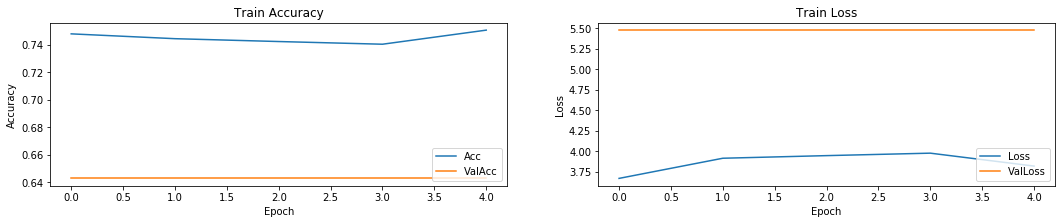

In [7]:
fig, ax = plt.subplots(1,2,figsize=(18,3))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Train Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Acc', 'ValAcc'], loc='lower right')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Train Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Loss', 'ValLoss'], loc='lower right')

In [ ]:
model.save('pneumonia.h5')
